# Netflix Analysis

### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

&nbsp;

### Read the CSV file as DataFrame

In [3]:
df = pd.read_csv(r"C:\Users\Abdo\Desktop\Projects\Netflix_Analysis_Project\Netflix.csv")

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


&nbsp;

### Sampling Data from a DataFrame

In [4]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7295,s7296,TV Show,Leyla and Mecnun,Onur Ünlü,"Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...",Turkey,"April 15, 2017",2014,TV-MA,3 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Destiny brings Mecnun and Leyla together as ne...
7948,s7949,TV Show,Save Our Shelter,NaN,"Rocky Kanaka, Rob North",United States,"August 18, 2018",2015,TV-G,1 Season,Reality TV,Pet rescue expert Rocky Kanaka and renovation ...
5481,s5482,Movie,Chamatkar,Rajiv Mehra,"Shah Rukh Khan, Naseeruddin Shah, Urmila Maton...",India,"May 15, 2017",1992,TV-14,164 min,"Comedies, International Movies, Sci-Fi & Fantasy",A village schoolteacher and the ghost of a mur...
2728,s2729,Movie,Humpty Sharma Ki Dulhania,Shashank Khaitan,"Varun Dhawan, Alia Bhatt, Ashutosh Rana, Sidha...",India,"April 1, 2020",2014,TV-14,131 min,"Comedies, International Movies, Romantic Movies",A small-town girl heads to Delhi to find a des...
8183,s8184,Movie,The Adventures of Sharkboy and Lavagirl,Robert Rodriguez,"Taylor Lautner, Taylor Dooley, Cayden Boyd, Ge...",United States,"December 2, 2020",2005,PG,93 min,Children & Family Movies,A 10-year-old dreamer's imaginary friends – mi...
7880,s7881,Movie,Rocky II,Sylvester Stallone,"Sylvester Stallone, Talia Shire, Burt Young, C...",United States,"August 1, 2019",1979,PG,119 min,"Dramas, Sports Movies","Featuring a rousing climax, this engaging sequ..."
7507,s7508,Movie,Moonlight,Barry Jenkins,"Trevante Rhodes, André Holland, Janelle Monáe,...",United States,"May 21, 2019",2016,R,111 min,"Dramas, Independent Movies, LGBTQ Movies","In a crime-infested Miami neighborhood, a gay ..."
7089,s7090,Movie,Inuyasha the Movie - La spada del dominatore d...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 1, 2017",2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...
7989,s7990,Movie,"Sexo, Pudor y Lagrimas",Antonio Serrano,"Demián Bichir, Susana Zabaleta, Jorge Salinas,...",Mexico,"December 15, 2017",1999,R,111 min,"Comedies, Dramas, International Movies",Passions flare and alliances form when neighbo...
6809,s6810,Movie,Froning: The Fittest Man in History,Heber Cannon,Rich Froning,United States,"July 15, 2018",2016,PG,99 min,"Documentaries, International Movies, Sports Mo...",Follow the grueling training regimen of Rich F...


&nbsp;

## 1- Data Cleaning and Processing

- Dealing with the missing data

In [5]:
# Replacments

# Replace blank countries with the mode (most common) country
df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


&nbsp;

- Date Conversion and Feature Extraction

In [8]:
# Remove leading/trailing spaces
df['date_added'] = df['date_added'].str.strip()

# Convert to datetime, handling errors by coercing invalid formats to NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month and month name
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


&nbsp;

- Feature Engineering and Data Cleaning: Extracting Key Attributes and Normalizing Data

In [9]:
# Quick feature engineering

# Helper column for various plots
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

# Genre

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,count,first_country,target_ages,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,1,USA,Teens,[Documentaries]
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,1,South Africa,Adults,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1,USA,Adults,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,1,USA,Adults,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,1,India,Adults,"[International TV Shows, Romantic TV Shows, TV..."


&nbsp;

- Save the Cleaned DataFrame As CSV File 

In [11]:
df.to_csv(r"C:\Users\Abdo\Desktop\Cleaned_Netflix.csv", index=False)

&nbsp;

## 2- Data Visualization

#### I'll use the Netflix brand colours

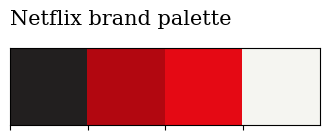

In [12]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
# Defining Netflix colors
netflix_colors = ['#221f1f', '#b20710', '#e50914', '#f5f5f1']

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

&nbsp;

- `Pie Chart`: Displays the Ratio of Movies & TV Shows

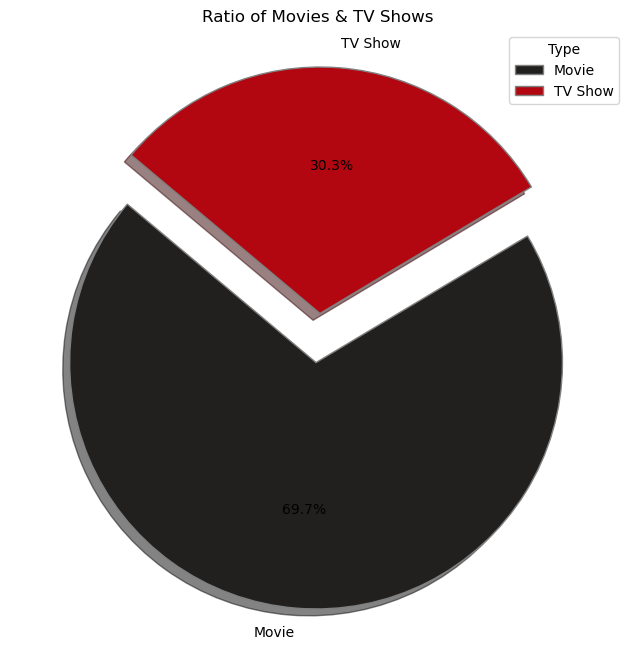

In [13]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x / y) * 100).round(2)

explode = (0.1, 0.1)  # Adjust as needed

# Creating a pie chart 
plt.figure(figsize=(10, 8))
plt.pie(
    r, 
    labels=r.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=netflix_colors[:len(r)], 
    explode=explode[:len(r)],  # Explode effect for the slices
    shadow=True,               # Adding shadow for a 3D effect
    wedgeprops=dict(edgecolor='grey')  # Adding an edge color to the wedges
)
plt.title('Ratio of Movies & TV Shows')
plt.legend(title='Type', loc='best')  # Adding a legend
plt.show()

&nbsp;

- `Histogram`: Distribution of Duration - Displays the distribution of movie durations

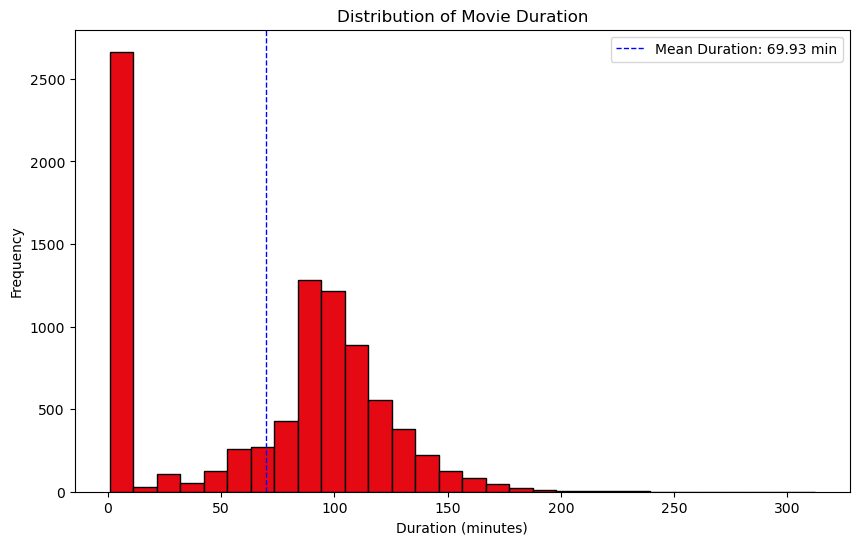

In [14]:
# Converting 'duration' to numeric values (in minutes)
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Calculate the mean duration
mean_duration = df['duration_numeric'].mean()

# Creating a histogram of durations
plt.figure(figsize=(10, 6))
plt.hist(df['duration_numeric'].dropna(), bins=30, color='#e50914', edgecolor='black')

# Adding a vertical line for the mean duration
plt.axvline(mean_duration, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Duration: {mean_duration:.2f} min')

plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()  # Show the legend with the mean duration label
plt.show()


&nbsp;

- `Box Plot`: Duration by Type - Visualizes the spread of durations for Movies and TV Shows.

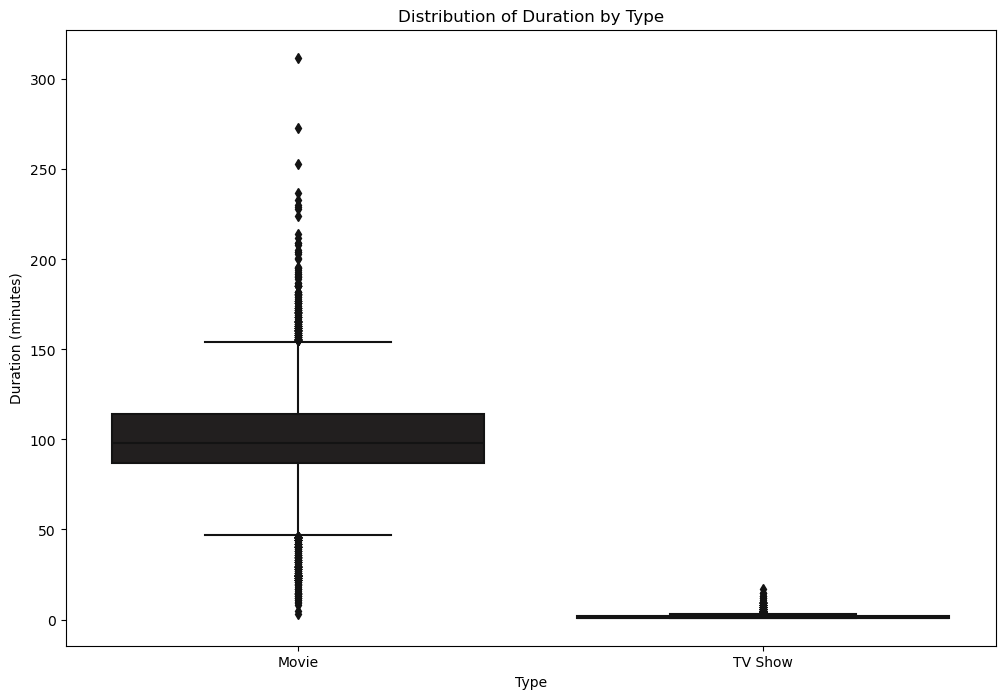

In [15]:
# Creating a box plot of duration by type
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='duration_numeric', data=df, palette=netflix_colors[:2])
plt.title('Distribution of Duration by Type')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()


&nbsp;

- `Count Plot`: Titles by Genre - Illustrates the number of titles for each genre.

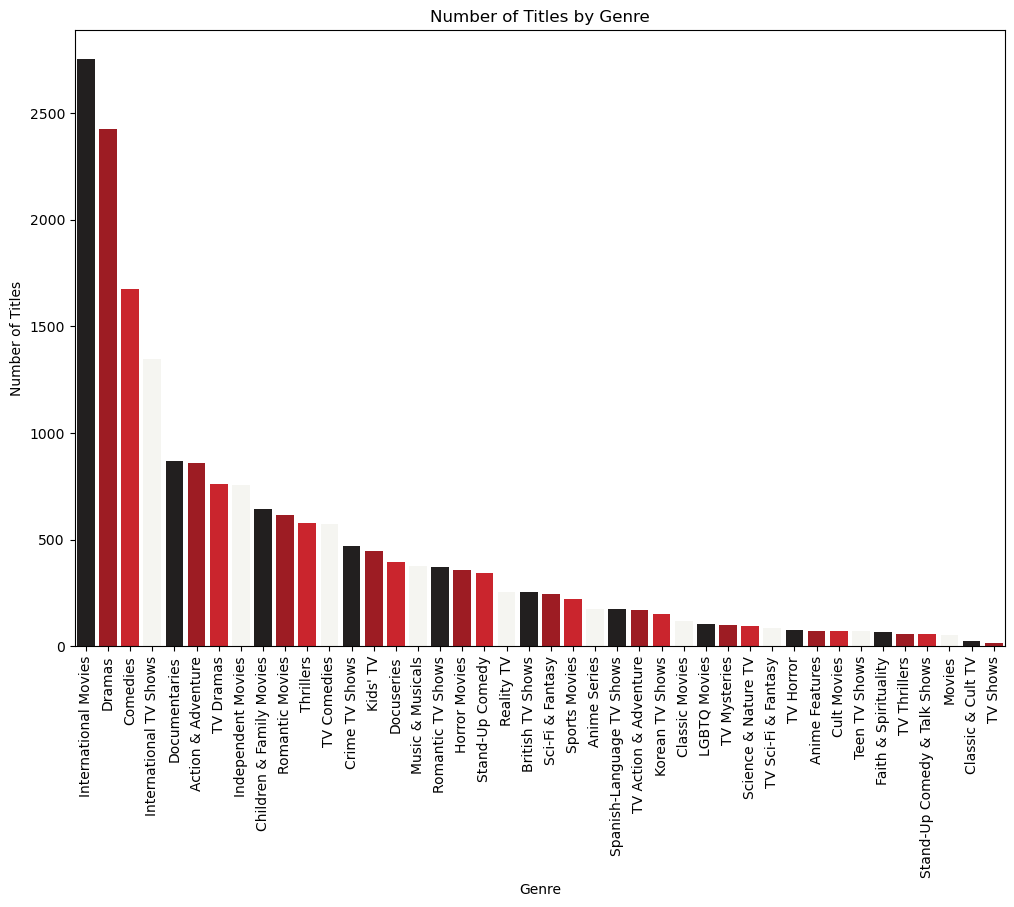

In [16]:
# Exploding the genres into separate rows
genres = df['listed_in'].str.get_dummies(sep=', ')

# Summing up the number of titles per genre
genre_counts = genres.sum().sort_values(ascending=False)

# Creating a count plot for genres
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=netflix_colors[:len(genre_counts)])
plt.xticks(rotation=90)
plt.title('Number of Titles by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.show()


&nbsp;  

## Conclusion

This analysis of the Netflix dataset provided insights into various aspects of the content available on the platform:

- **Ratio of Movies to TV Shows**: Visualized using a pie chart to show the proportion of movies versus TV shows.
- **Distribution of Movie Duration**: A histogram depicted the range of movie lengths, with a vertical line indicating the mean duration.
- **Additional Insights**:
  - Comparison of movie and TV show durations using a box plot.
  - Number of titles by genre.

These visualizations reveal key trends and distributions in Netflix's content library. Future analyses could explore content popularity trends, viewer ratings, and personalized recommendations for even deeper insights.

### About the Author

- **Name**: Abdelrahman Alaa  
- **Email**: [3bdo3laa1@gmail.com](mailto:3bdo3laa1@gmail.com)  
- **LinkedIn**: [www.linkedin.com/in/3bdo-3laa1](https://www.linkedin.com/in/3bdo-3laa1)  
- **GitHub**: [https://github.com/Abdo3laa](https://github.com/Abdo3laa)

Thank you for reviewing this analysis. For any questions or feedback, please contact me.
ck, please contact me.
